In [1]:
# standard imports
import acquire
import pandas as pd
import numpy as np

# import prepare
import prepare

# import model
from model import knn_model, decision_tree, log_model, forest_model

In [2]:
#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns



#import sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

#stats tests
from scipy.stats import pearsonr
from scipy import stats

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

In [3]:
df = acquire.clean_join_data()

In [4]:
df

,Game,North America,Europe,Japan,Rest of World,Global,Year,Meta Score,User Review,IGN Position,Genre
0,.hack//G.U. Last Recode,0.10,0.04,0.08,0.03,0.24,2017.0,72,8.15,NaN,Role-Playing
1,.hack//Infection Part 1,0.49,0.38,0.26,0.13,1.27,2002.0,75,8.30,NaN,Role-Playing
2,.hack//Mutation Part 2,0.23,0.18,0.20,0.06,0.68,2002.0,76,8.50,NaN,Role-Playing
3,.hack//Outbreak Part 3,0.14,0.11,0.17,0.04,0.46,2002.0,70,8.20,NaN,Role-Playing
4,007 Racing,0.30,0.20,0.00,0.03,0.53,2000.0,51,4.90,NaN,Racing
...,...,...,...,...,...,...,...,...,...,...,...
4989,de Blob,0.49,0.37,0.00,0.10,0.96,2008.0,77,7.75,NaN,Platform
4990,de Blob 2,0.40,0.19,0.00,0.07,0.65,2011.0,75,7.35,NaN,Platform
4992,htoL#NiQ: The Firefly Diary,0.00,0.00,0.01,0.00,0.01,2014.0,58,7.50,NaN,Platform
4993,nail'd,0.16,0.04,0.00,0.03,0.22,2010.0,66,6.97,NaN,Racing


In [5]:
# replacing integer values in IGN Position with Yes
df['IGN Position'].where(df['IGN Position'].isna(), "Yes", inplace=True)

In [6]:
# replacing na values in IGN Position with No
df["IGN Position"].fillna("No", inplace = True)

In [7]:
df.head()

,Game,North America,Europe,Japan,Rest of World,Global,Year,Meta Score,User Review,IGN Position,Genre
0,.hack//G.U. Last Recode,0.10,0.04,0.08,0.03,0.24,2017.0,72,8.15,No,Role-Playing
1,.hack//Infection Part 1,0.49,0.38,0.26,0.13,1.27,2002.0,75,8.30,No,Role-Playing
2,.hack//Mutation Part 2,0.23,0.18,0.20,0.06,0.68,2002.0,76,8.50,No,Role-Playing
3,.hack//Outbreak Part 3,0.14,0.11,0.17,0.04,0.46,2002.0,70,8.20,No,Role-Playing
4,007 Racing,0.30,0.20,0.00,0.03,0.53,2000.0,51,4.90,No,Racing


In [8]:
df[df['IGN Position']=='Yes']


,Game,North America,Europe,Japan,Rest of World,Global,Year,Meta Score,User Review,IGN Position,Genre
56,Advance Wars,0.50,0.19,0.00,0.01,0.70,2001.0,92,8.90,Yes,Strategy
73,Age of Empires II: The Age of Kings,0.01,0.08,0.00,0.01,0.09,1999.0,92,9.10,Yes,Strategy
99,Alien: Isolation,3.43,5.41,0.29,1.29,10.44,2014.0,80,8.32,Yes,Shooter
124,Animal Crossing,1.92,0.16,0.99,0.09,3.15,2001.0,87,8.80,Yes,Simulation
127,Animal Crossing: New Leaf,2.03,2.36,4.39,0.39,9.16,2012.0,88,8.70,Yes,Simulation
204,Assassin's Creed II,5.66,3.93,0.29,1.46,11.36,2009.0,89,8.30,Yes,Action
205,Assassin's Creed II,5.66,3.93,0.29,1.46,11.36,2010.0,89,8.30,Yes,Action
209,Assassin's Creed IV: Black Flag,21.65,17.96,0.56,5.95,46.08,2013.0,85,8.00,Yes,Action
214,Assassin's Creed: Brotherhood,4.87,1.27,0.14,0.63,6.90,2010.0,89,8.33,Yes,Action
215,Assassin's Creed: Brotherhood,4.87,1.27,0.14,0.63,6.90,2011.0,89,8.33,Yes,Action


In [9]:
df.reset_index(drop=True, inplace= True)

# Summary Statistics

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4832 entries, 0 to 4831
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           4832 non-null   object 
 1   North America  4832 non-null   float64
 2   Europe         4832 non-null   float64
 3   Japan          4832 non-null   float64
 4   Rest of World  4832 non-null   float64
 5   Global         4832 non-null   float64
 6   Year           4832 non-null   float64
 7   Meta Score     4832 non-null   int64  
 8   User Review    4832 non-null   float64
 9   IGN Position   4832 non-null   object 
 10  Genre          4832 non-null   object 
dtypes: float64(7), int64(1), object(3)
memory usage: 415.4+ KB


In [11]:
df.shape

(4832, 11)

In [12]:
df.describe()

,North America,Europe,Japan,Rest of World,Global,Year,Meta Score,User Review
count,4832.000000,4832.000000,4832.000000,4832.000000,4832.000000,4832.000000,4832.000000,4832.000000
mean,0.937676,0.634803,0.141892,0.214905,1.929677,2006.876242,70.635141,7.290820
std,2.908060,3.049161,0.443201,0.937877,6.806111,5.060184,13.223629,1.264076
min,0.000000,0.000000,0.000000,0.000000,0.010000,1980.000000,22.000000,1.300000
25%,0.080000,0.020000,0.000000,0.010000,0.170000,2003.000000,63.000000,6.772500
50%,0.240000,0.110000,0.000000,0.040000,0.510000,2007.000000,72.000000,7.600000
75%,0.810000,0.422500,0.080000,0.140000,1.570000,2010.000000,80.000000,8.200000
max,77.640000,88.220000,6.500000,26.800000,197.120000,2018.000000,99.000000,9.700000


In [13]:
df.Genre.value_counts()

Action          1003
Role-Playing     670
Shooter          555
Sports           531
Racing           421
Platform         331
Misc             301
Fighting         274
Strategy         262
Simulation       253
Adventure        231
Name: Genre, dtype: int64

In [14]:
len(df)

4832

In [15]:
df

,Game,North America,Europe,Japan,Rest of World,Global,Year,Meta Score,User Review,IGN Position,Genre
0,.hack//G.U. Last Recode,0.10,0.04,0.08,0.03,0.24,2017.0,72,8.15,No,Role-Playing
1,.hack//Infection Part 1,0.49,0.38,0.26,0.13,1.27,2002.0,75,8.30,No,Role-Playing
2,.hack//Mutation Part 2,0.23,0.18,0.20,0.06,0.68,2002.0,76,8.50,No,Role-Playing
3,.hack//Outbreak Part 3,0.14,0.11,0.17,0.04,0.46,2002.0,70,8.20,No,Role-Playing
4,007 Racing,0.30,0.20,0.00,0.03,0.53,2000.0,51,4.90,No,Racing
...,...,...,...,...,...,...,...,...,...,...,...
4827,de Blob,0.49,0.37,0.00,0.10,0.96,2008.0,77,7.75,No,Platform
4828,de Blob 2,0.40,0.19,0.00,0.07,0.65,2011.0,75,7.35,No,Platform
4829,htoL#NiQ: The Firefly Diary,0.00,0.00,0.01,0.00,0.01,2014.0,58,7.50,No,Platform
4830,nail'd,0.16,0.04,0.00,0.03,0.22,2010.0,66,6.97,No,Racing


# Univariate Data

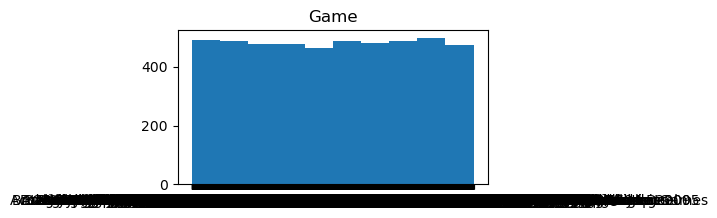

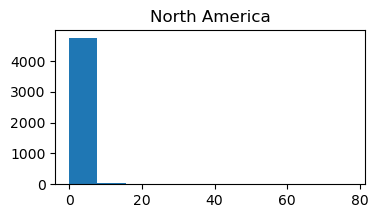

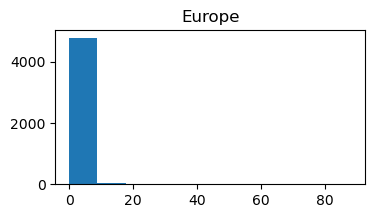

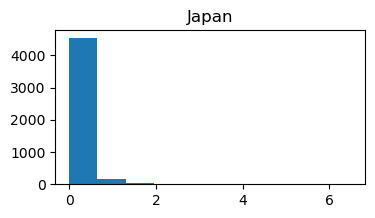

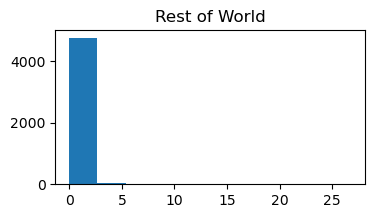

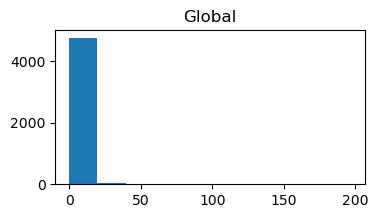

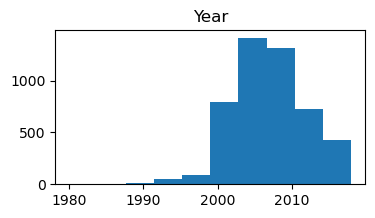

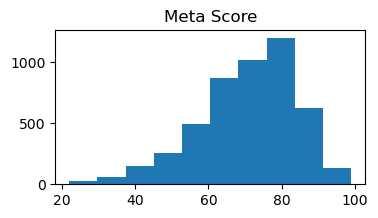

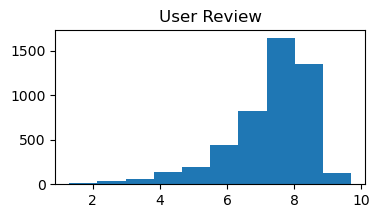

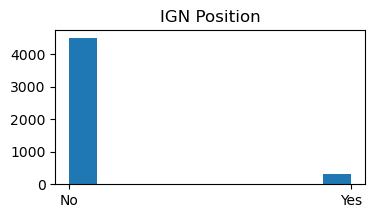

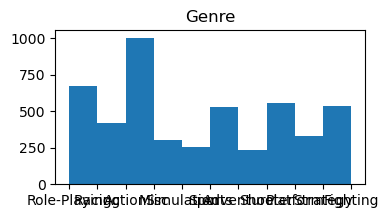

In [16]:
for col in df.columns:
    column_data = df[col]
    plt.figure(figsize=(4, 2))
    plt.hist(column_data)
    plt.title(col)
    plt.show()

In [17]:
train, validate, test = prepare.split_data()

# Bivariate Data

In [18]:
def plot_variable_pairs(df):
    
    sns.set(style="ticks")
    sns.pairplot(df, kind="reg", diag_kind="kde", plot_kws={"line_kws": {"color": "red"}}, corner="lower")
    plt.show()

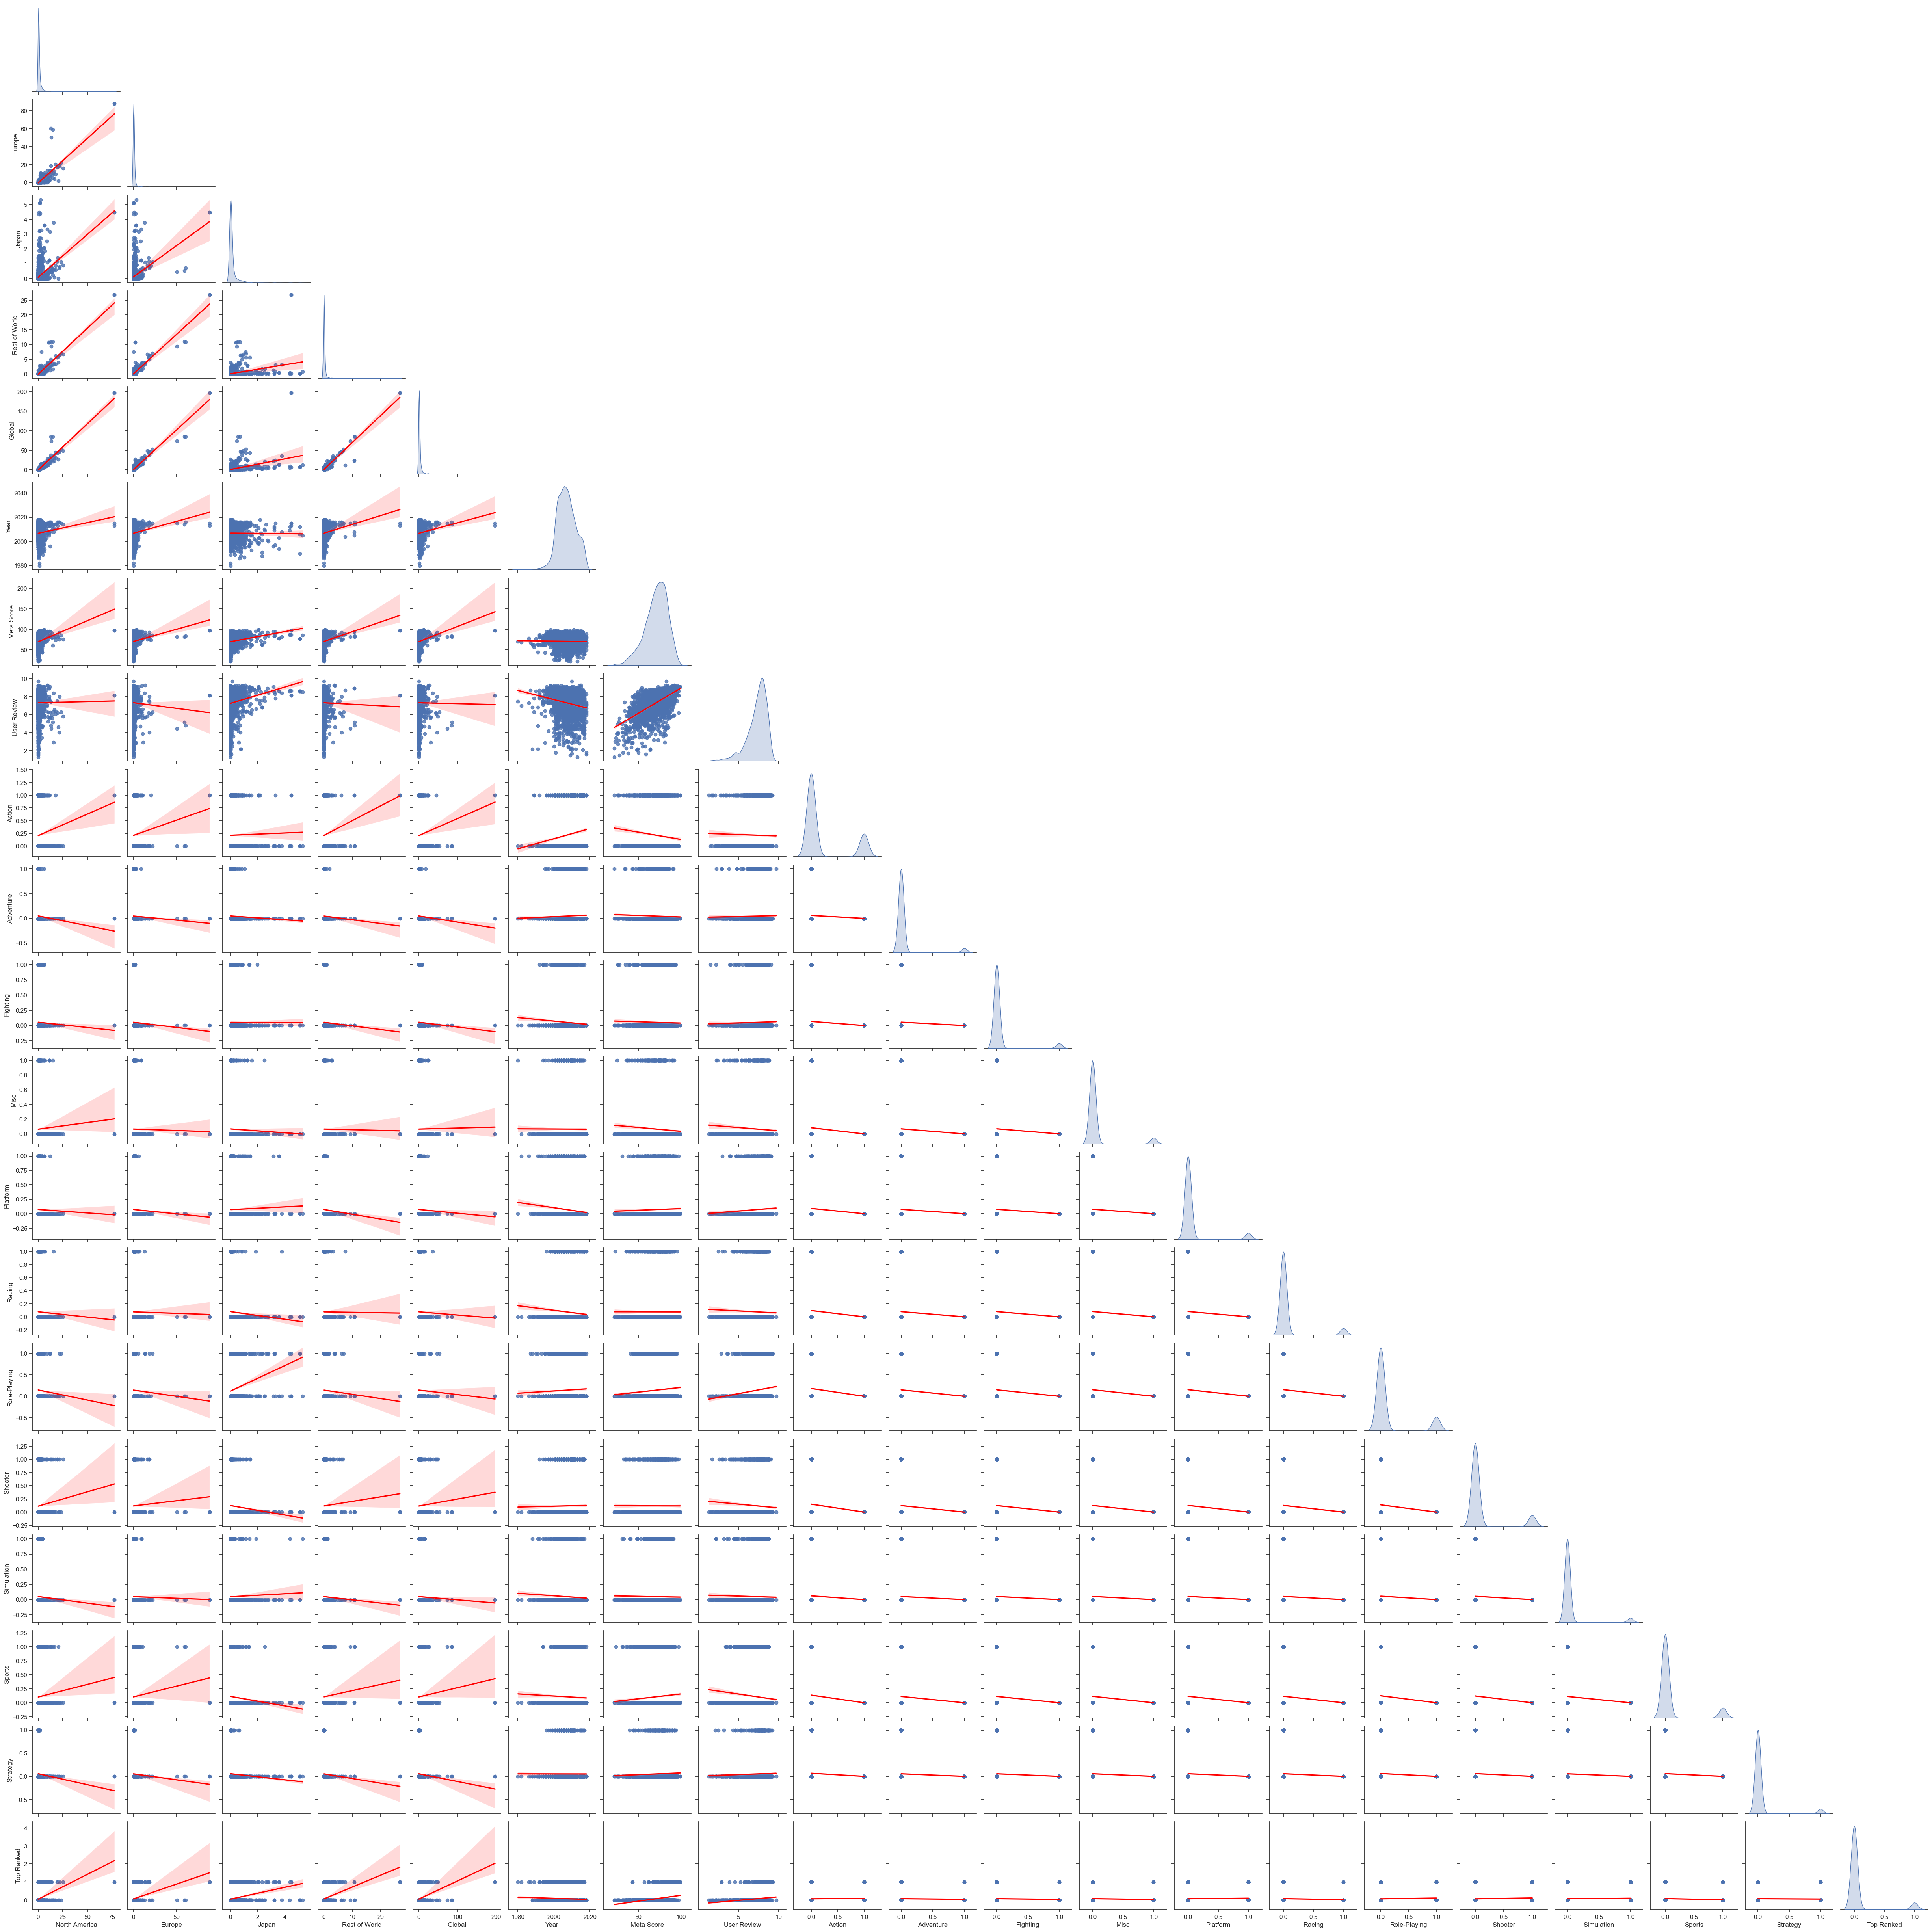

In [19]:
plot_variable_pairs(train)

In [20]:
# separeate discrete from continuous variables
continuous_col = []
categorical_col = []
target = "Top Ranked"

for col in train.drop(columns=['Game', 'Top Ranked']).columns:
    if col == target:
        pass
    elif train[col].dtype == "O":
        categorical_col.append(col)

    else:
        if len(train[col].unique()) < 20: #making anything with less than 4 unique values a catergorical value
            categorical_col.append(col)
        else:
            continuous_col.append(col)
            
categorical_col, continuous_col

(['Action',
  'Adventure',
  'Fighting',
  'Misc',
  'Platform',
  'Racing',
  'Role-Playing',
  'Shooter',
  'Simulation',
  'Sports',
  'Strategy'],
 ['North America',
  'Europe',
  'Japan',
  'Rest of World',
  'Global',
  'Year',
  'Meta Score',
  'User Review'])

In [21]:
import itertools


# Get a sample of the categorical columns for ploting
train_categorical = train[categorical_col]

# pairs of comninmations
categorical_comb = list(itertools.product(categorical_col, ["IGN Position"]))
categorical_comb

[('Action', 'IGN Position'),
 ('Adventure', 'IGN Position'),
 ('Fighting', 'IGN Position'),
 ('Misc', 'IGN Position'),
 ('Platform', 'IGN Position'),
 ('Racing', 'IGN Position'),
 ('Role-Playing', 'IGN Position'),
 ('Shooter', 'IGN Position'),
 ('Simulation', 'IGN Position'),
 ('Sports', 'IGN Position'),
 ('Strategy', 'IGN Position')]

In [22]:
len(train)

2705

In [23]:
train.sort_values(by='North America', ascending=False)

,Game,North America,Europe,Japan,Rest of World,Global,Year,Meta Score,User Review,Action,Adventure,Fighting,Misc,Platform,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Top Ranked
1697,Grand Theft Auto V,77.64,88.22,4.47,26.80,197.12,2015.0,97,8.14,1,0,0,0,0,0,0,0,0,0,0,1
1695,Grand Theft Auto V,77.64,88.22,4.47,26.80,197.12,2013.0,97,8.14,1,0,0,0,0,0,0,0,0,0,0,1
909,Destiny,25.42,16.18,0.92,6.70,49.23,2014.0,76,5.80,0,0,0,0,0,0,0,1,0,0,0,1
1360,Fallout 4,23.10,22.03,1.12,6.98,53.20,2015.0,86,6.27,0,0,0,0,0,0,1,0,0,0,0,0
4205,The Elder Scrolls V: Skyrim,21.50,18.52,0.79,6.28,47.10,2016.0,92,8.00,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Age of Empires III,0.00,0.33,0.00,0.05,0.38,2005.0,81,7.80,0,0,0,0,0,0,0,0,0,0,1,0
3430,Romance of the Three Kingdoms XI,0.00,0.00,0.07,0.00,0.07,2007.0,70,7.65,0,0,0,0,0,0,0,0,0,0,1,0
2084,Knights of Honor,0.00,0.02,0.00,0.01,0.03,2004.0,77,8.80,0,0,0,0,0,0,0,0,0,0,1,0
3937,Still Life 2,0.00,0.01,0.00,0.00,0.02,2009.0,67,5.60,0,1,0,0,0,0,0,0,0,0,0,0


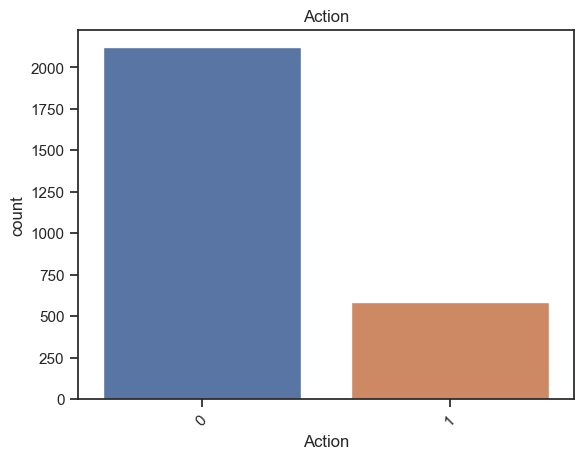

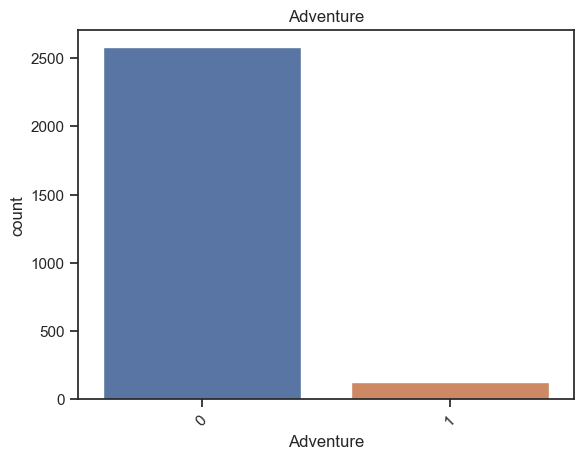

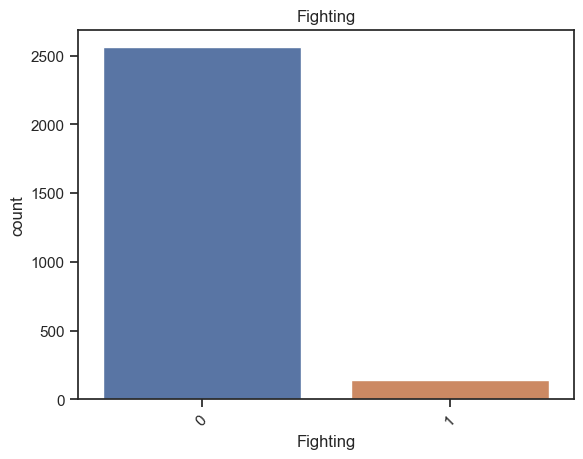

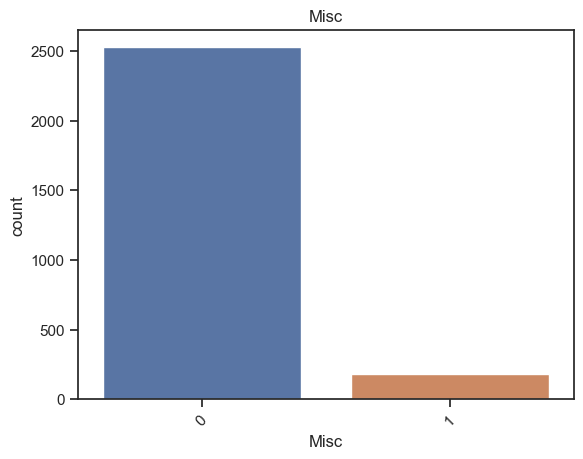

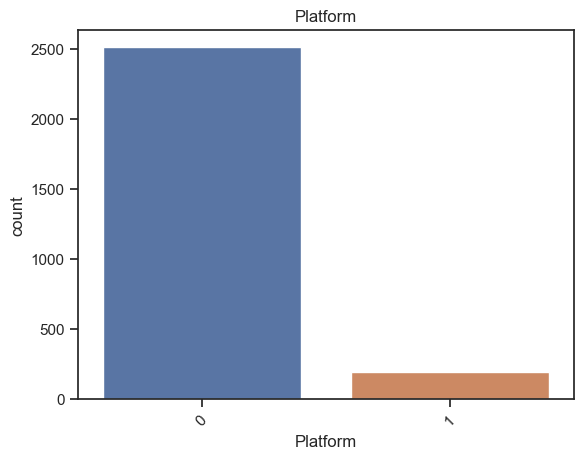

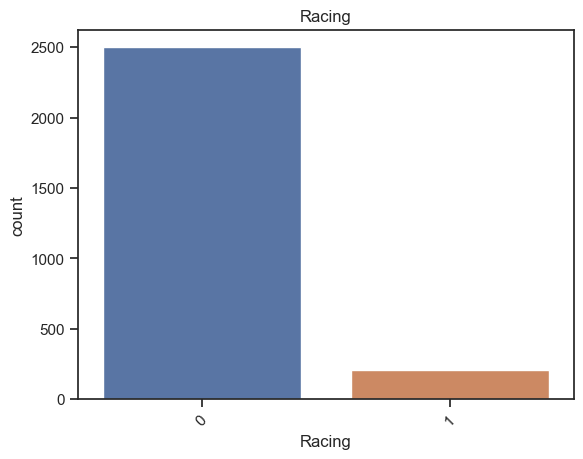

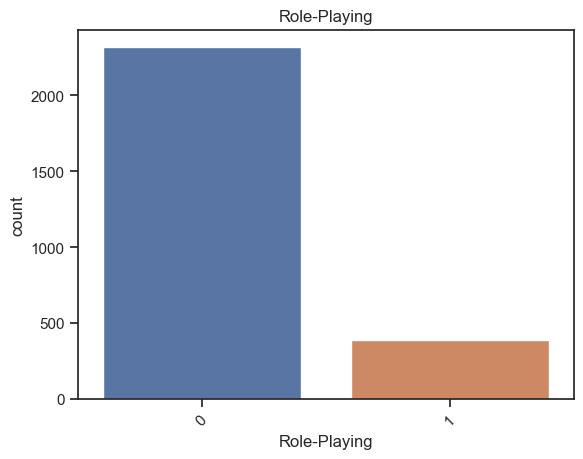

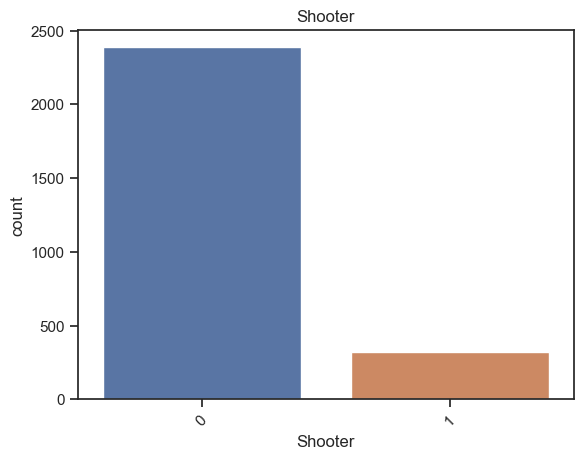

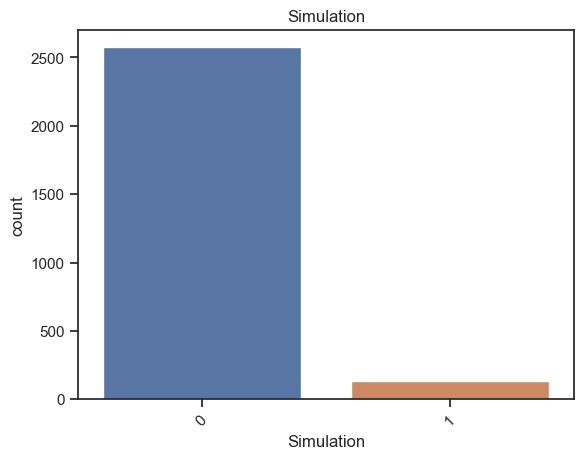

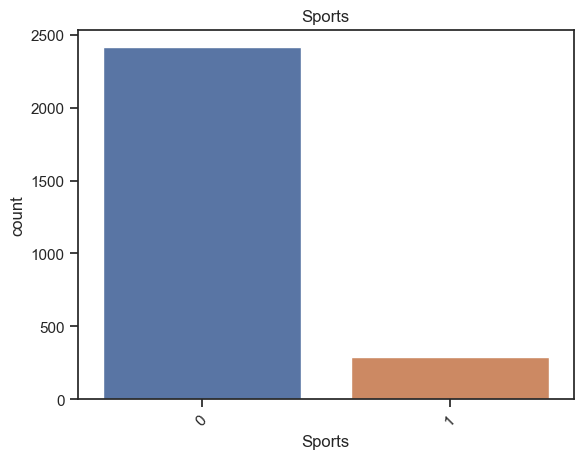

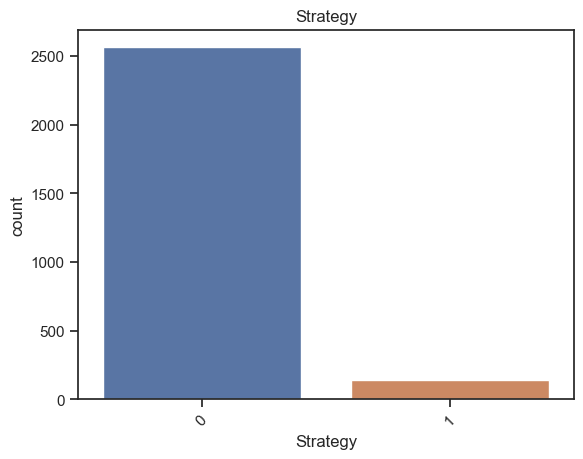

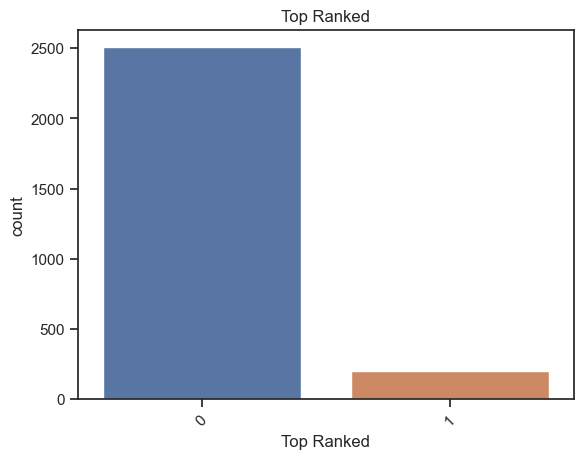

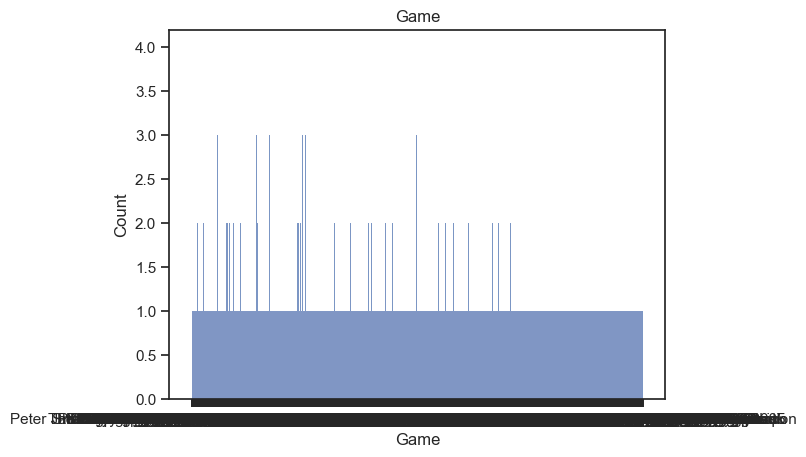

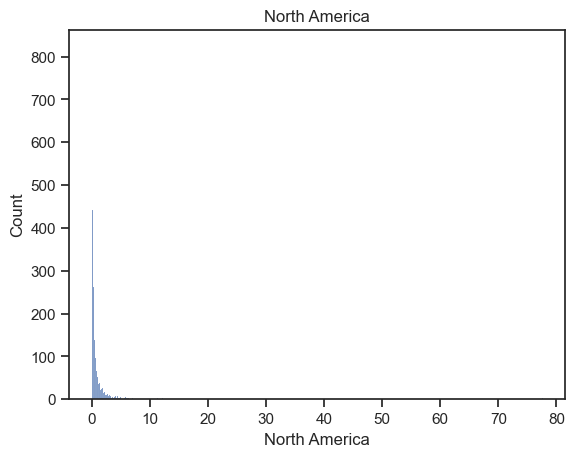

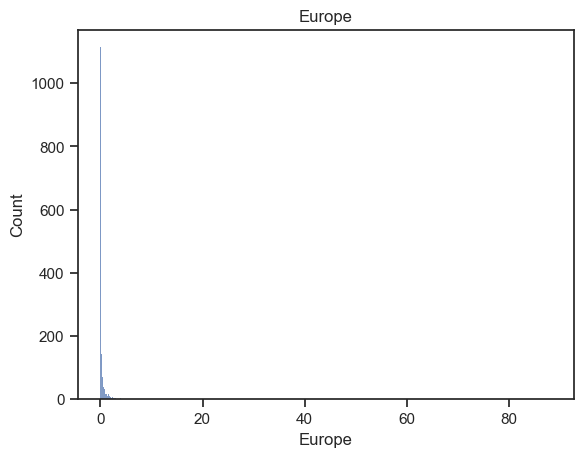

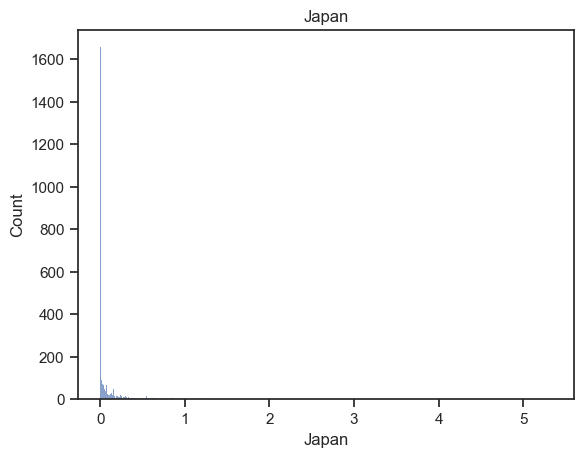

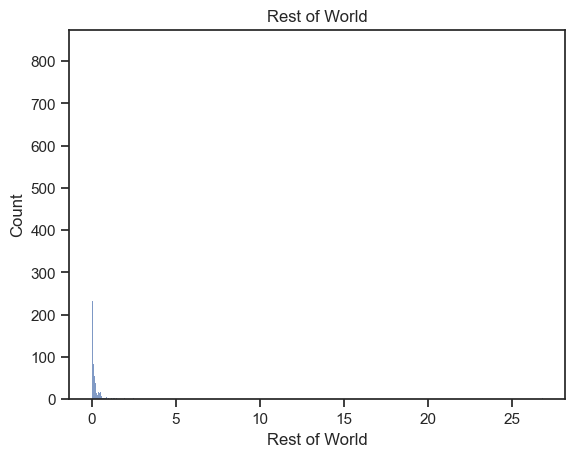

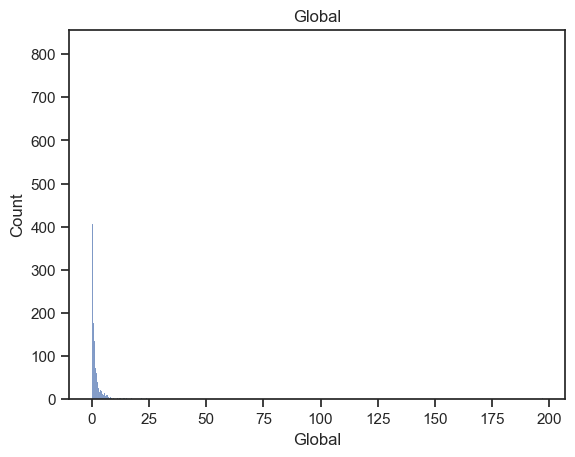

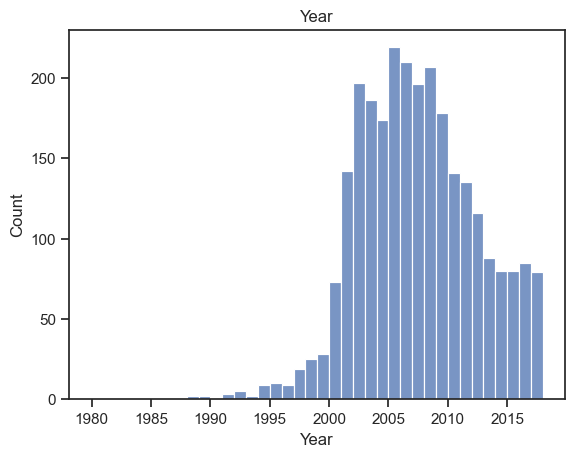

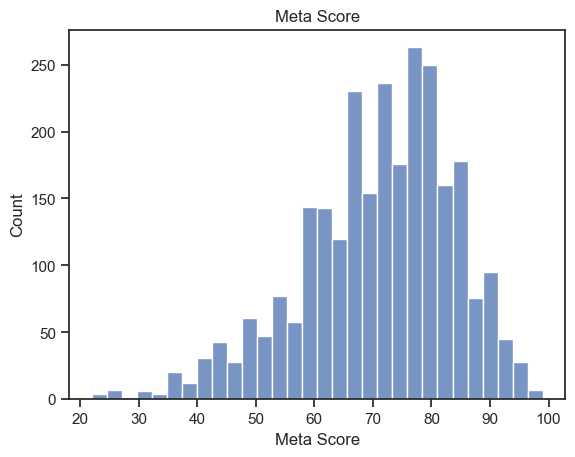

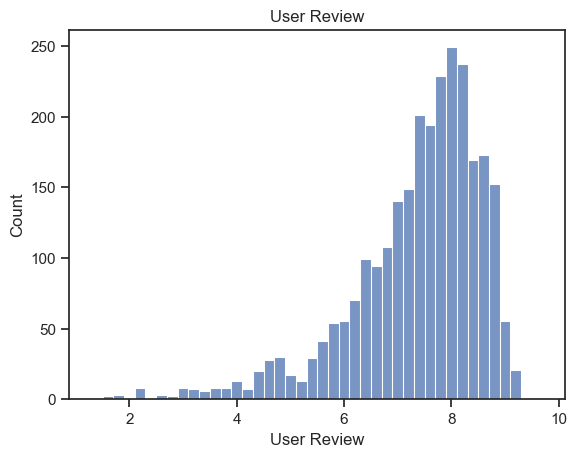

In [24]:
categorical_col = []
continuous_col = []

# create a for loop that iterates through each value in train dataframe
for col in train:
    # appends the column name to categoriacl_col if there are less than 10 categories in column
    if train[col].nunique() < 4:
        categorical_col.append(col)
    else: 
    # appends the column name to continuous_list if there are less than 10 categories in column
        continuous_col.append(col)

# create a for loop that iterates through each value in categorical_col
for feature in categorical_col:
    
    # plots the points using the items(features) in the cat_list
    sns.countplot(x=feature, data=train)
    plt.title(feature)
    plt.xticks(rotation=45)

    plt.show()
    
    
for feature in continuous_col:
    
    sns.histplot(x=feature, data=train)
    plt.title(feature)
    plt.show()

In [25]:
categorical_col

['Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy',
 'Top Ranked']

In [26]:
continuous_col

['Game',
 'North America',
 'Europe',
 'Japan',
 'Rest of World',
 'Global',
 'Year',
 'Meta Score',
 'User Review']

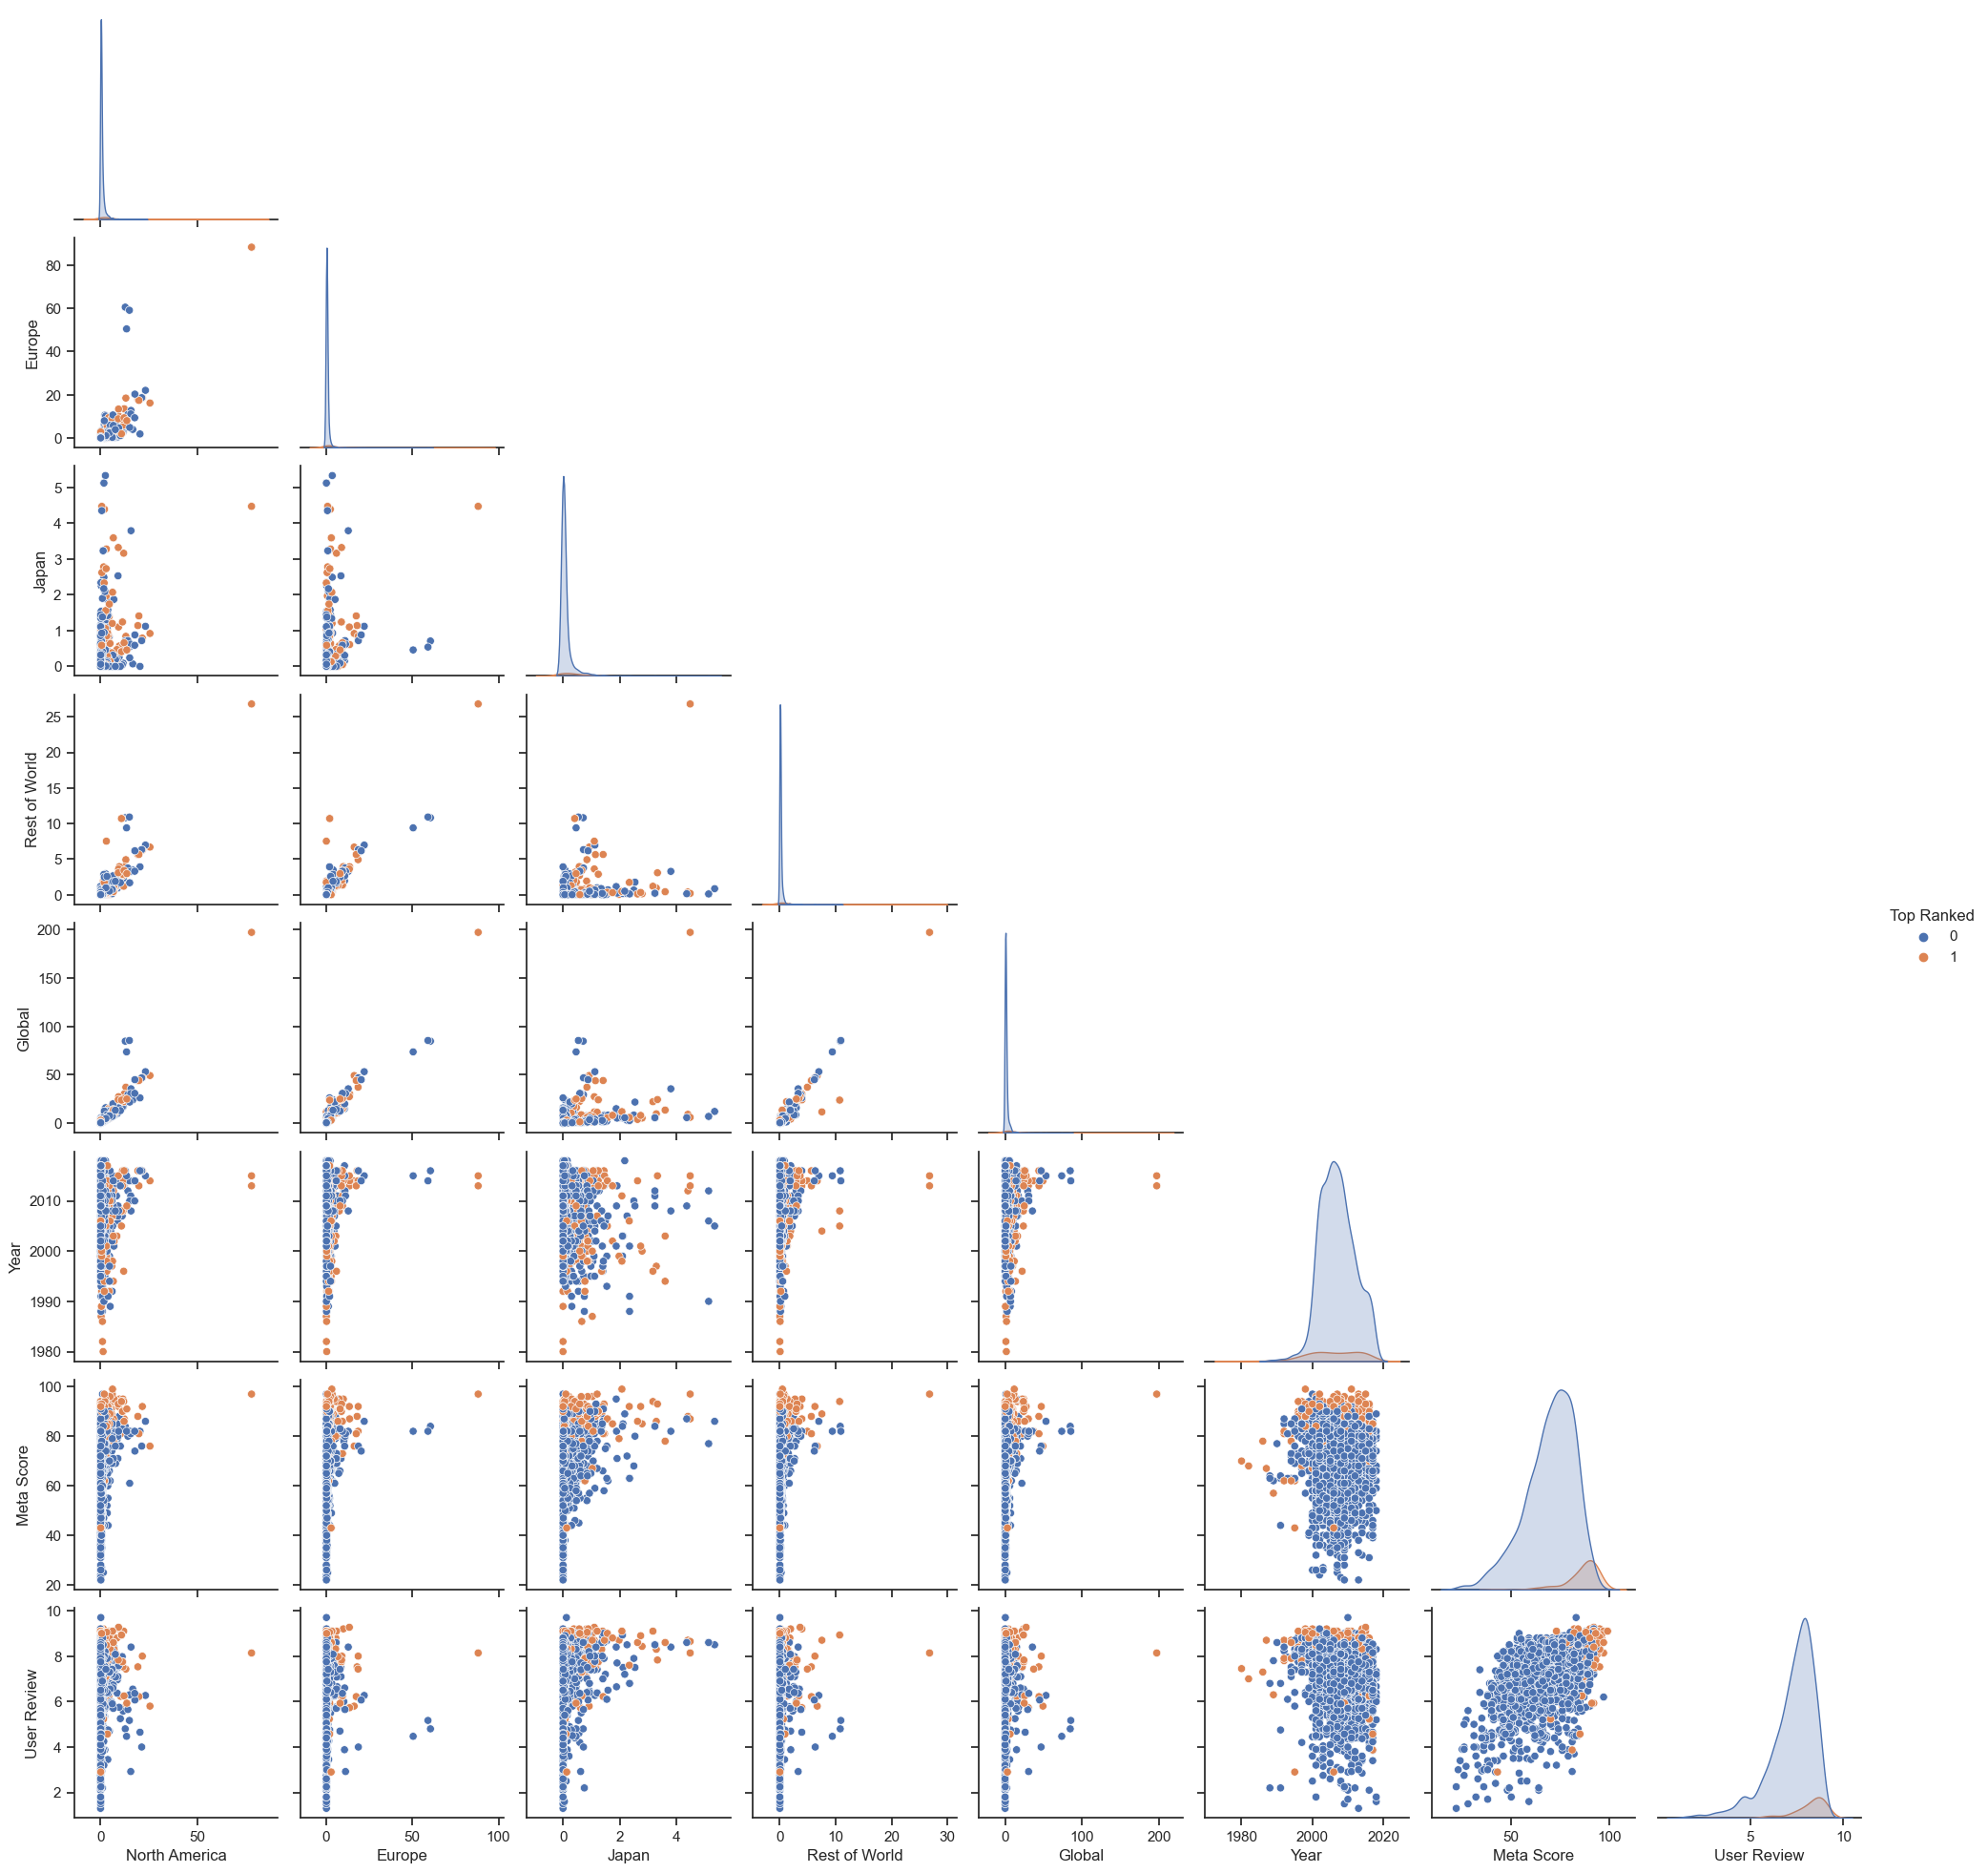

In [27]:
# pair plot
# adding 'churn' to be able to hue on churn data

sns.pairplot(data=train[['Game','North America','Europe','Japan','Rest of World','Global','Year','Meta Score','User Review','Top Ranked']], hue = 'Top Ranked', corner=True)
plt.show()

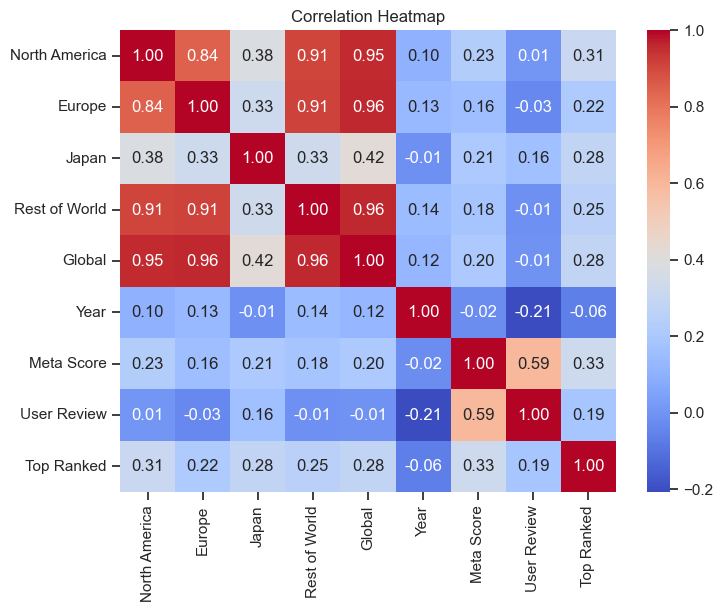

In [28]:
correlation_matrix = train[['Game','North America','Europe','Japan','Rest of World','Global','Year','Meta Score','User Review','Top Ranked']].corr()

# Create the heatmap with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 12})
plt.title('Correlation Heatmap')
plt.show()

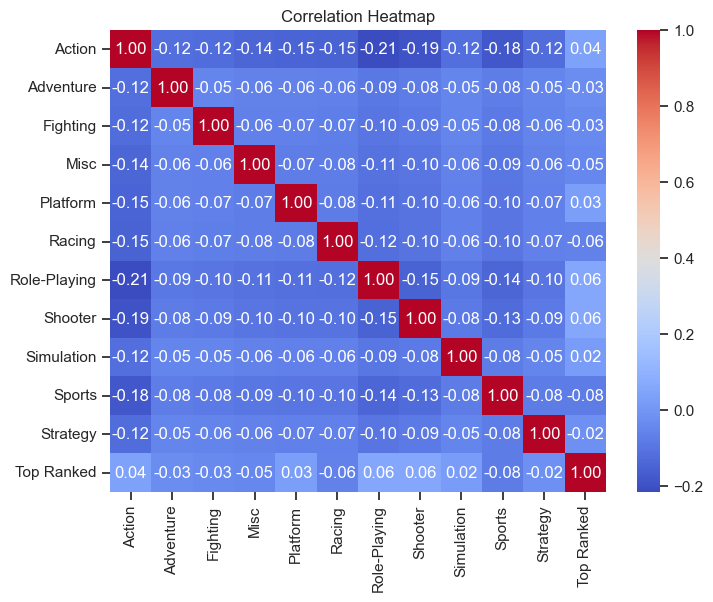

In [29]:
correlation_matrix = train[[ 'Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy',
 'Top Ranked']].corr()

# Create the heatmap with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 12})
plt.title('Correlation Heatmap')
plt.show()

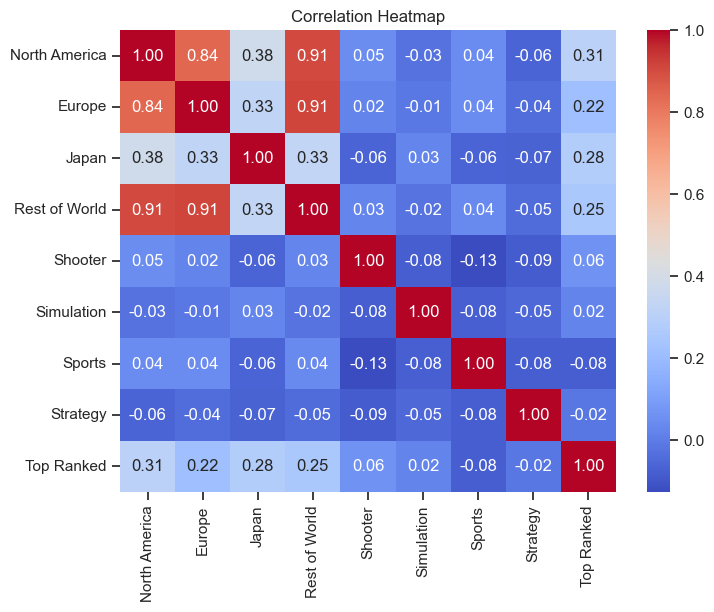

In [30]:

correlation_matrix = train[['Game','North America','Europe','Japan','Rest of World', 'Shooter',
 'Simulation',
 'Sports',
 'Strategy',
 'Top Ranked']].corr()

# Create the heatmap with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 12})
plt.title('Correlation Heatmap')
plt.show()

In [31]:
import pandas as pd
from scipy import stats


continuous_col = ['North America', 'Europe', 'Japan', 'Rest of World', 'Global', 'Year', 'Meta Score', 'User Review']

# Create an empty list to store the t-test results
results = []


for col in continuous_col:
    
    # one-sample t-test
    r, p = stats.ttest_1samp(train[train['Top Ranked'] == 1][col], train[col].mean())
    
    # Append the result as a dictionary to the results list
    results.append({'Column': col, 'Coefficient': r, 'P-value': p})

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Print the results DataFrame
print(results_df)


          Column  Coefficient       P-value
0  North America     5.319541  2.799103e-07
1         Europe     3.963187  1.032087e-04
2          Japan     6.770358  1.425395e-10
3  Rest of World     4.156091  4.815691e-05
4         Global     4.804336  3.061031e-06
5           Year    -2.163555  3.169630e-02
6     Meta Score    23.926861  2.491554e-60
7    User Review    10.990334  3.044696e-22


In [32]:
top_ranked_country = train[['Game', 'North America', 'Europe', 'Japan', 'Rest of World', 'Top Ranked']]

In [33]:
col_list = top_ranked_country.columns

# pairs of comninmations
continuous_comb = list(itertools.product(col_list, ["Top Ranked"]))
continuous_comb = continuous_comb[1:]
continuous_comb

[('North America', 'Top Ranked'),
 ('Europe', 'Top Ranked'),
 ('Japan', 'Top Ranked'),
 ('Rest of World', 'Top Ranked'),
 ('Top Ranked', 'Top Ranked')]

In [34]:
region_sales = top_ranked_country[top_ranked_country['Top Ranked'] == 1].sort_values(by='North America', ascending=False).drop_duplicates().head(10)
region_sales_not_rank = top_ranked_country[top_ranked_country['Top Ranked'] == 0].sort_values(by='North America', ascending=False).head(10)


In [35]:
region_sales_not_rank

,Game,North America,Europe,Japan,Rest of World,Top Ranked
1360,Fallout 4,23.10,22.03,1.12,6.98,0
538,Call of Duty: Infinite Warfare,21.17,18.63,0.72,6.34,0
2284,Madden NFL 17,20.30,1.87,0.00,3.93,0
4786,Watch Dogs,17.66,20.28,0.88,6.18,0
534,Call of Duty: Black Ops,17.57,9.35,0.59,3.31,0
2685,NBA 2K15,16.58,3.96,0.07,3.50,0
2346,Mario Kart Wii,15.68,12.76,3.79,3.29,0
540,Call of Duty: Modern Warfare 3,15.54,11.15,0.62,3.29,0
2036,Kinect Adventures!,15.00,4.89,0.24,1.69,0
1322,FIFA 15,14.85,59.06,0.54,10.92,0


In [36]:
region_sales

,Game,North America,Europe,Japan,Rest of World,Top Ranked
1697,Grand Theft Auto V,77.64,88.22,4.47,26.80,1
909,Destiny,25.42,16.18,0.92,6.70,1
4205,The Elder Scrolls V: Skyrim,21.50,18.52,0.79,6.28,1
312,Battlefield 4,19.74,17.38,1.41,5.66,1
305,Battlefield 1,19.20,17.89,1.14,5.64,1
539,Call of Duty: Modern Warfare 2,13.52,8.02,0.46,2.97,1
1375,Far Cry 4,13.02,18.46,0.84,4.93,1
946,Diablo III,12.18,13.52,0.61,3.94,1
2990,Overwatch,12.10,9.34,0.66,3.41,1
4000,Super Mario 64,11.92,5.92,3.16,1.20,1


In [37]:
len(top_ranked_country[top_ranked_country['Top Ranked']==1])

199

# How do regional sales relate to Ranking in Top 500

## North American Top Ranked Sales

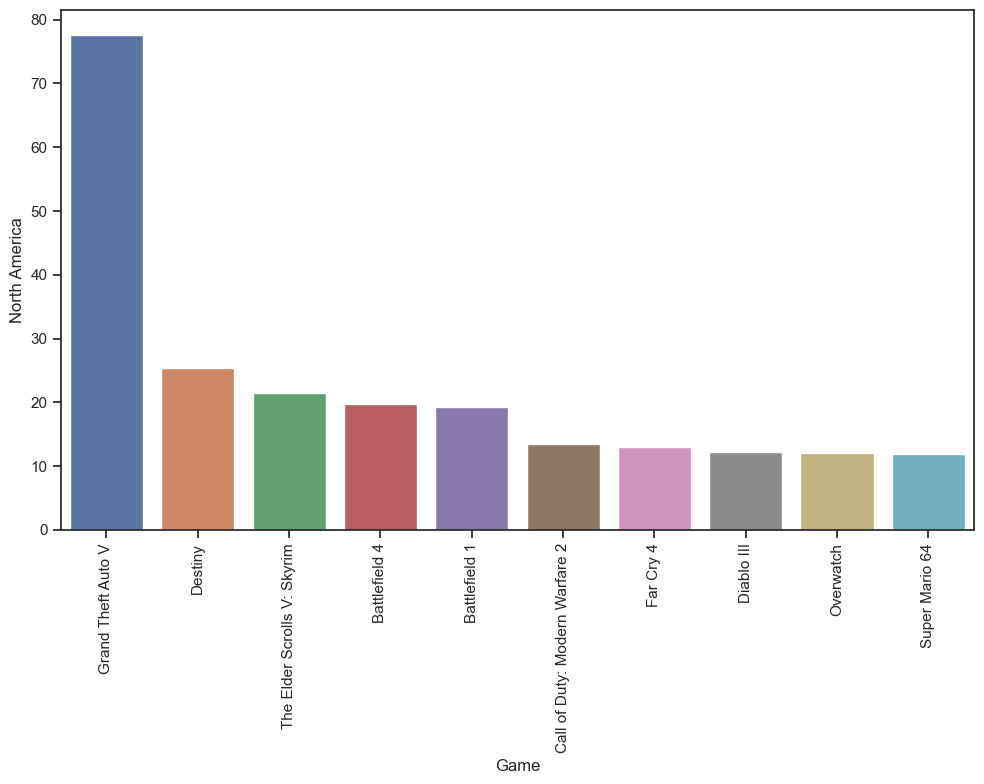

In [38]:
fig, ax = plt.subplots(figsize=(10, 8))
# fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(18,5))   , ax= ax[0]    , ax= ax[1]    , ax= ax[2]     , ax= ax[3]

sns.barplot(data=region_sales,x='Game', y= 'North America')
plt.xticks(ticks=range(len(region_sales)), labels=region_sales['Game'], rotation=90)

# sns.countplot(data= top_ranked_country[top_ranked_country['Top Ranked']==1], x= 'Japan')
# sns.countplot(data= top_ranked_country[top_ranked_country['Top Ranked']==1], x= 'Rest of World')


plt.tight_layout()

## North American NOT Top Ranked Sales


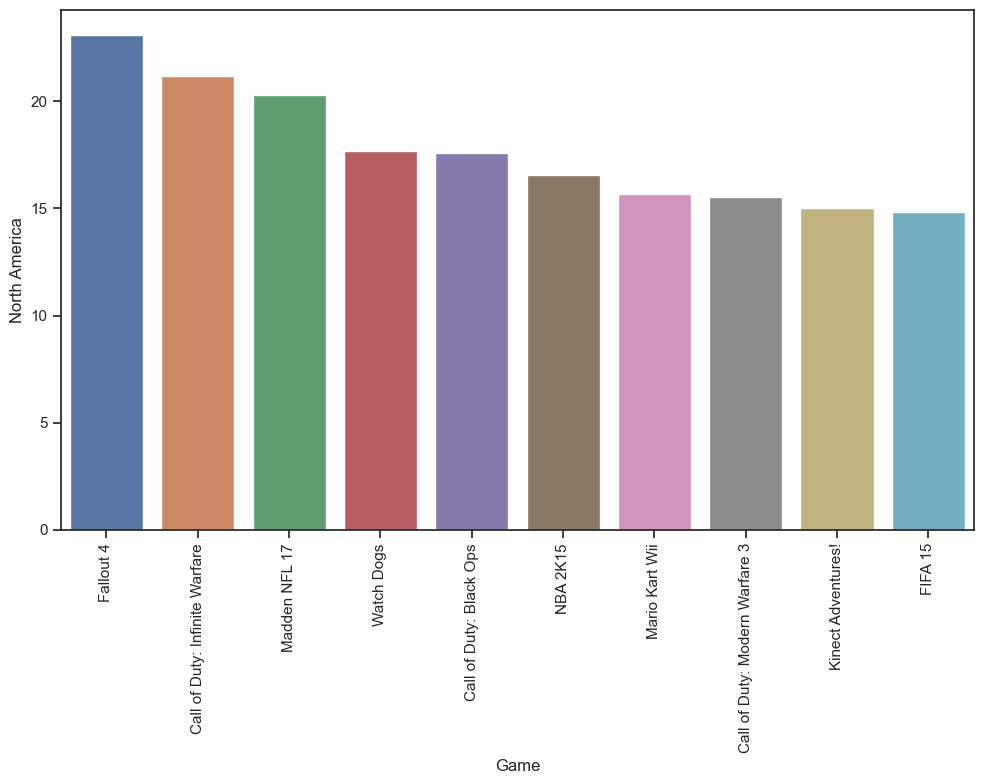

In [39]:
fig, ax = plt.subplots(figsize=(10, 8))
# fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(18,5))   , ax= ax[0]    , ax= ax[1]    , ax= ax[2]     , ax= ax[3]

sns.barplot(data=region_sales_not_rank,x='Game', y= 'North America')
plt.xticks(ticks=range(len(region_sales_not_rank)), labels=region_sales_not_rank['Game'], rotation=90)

# sns.countplot(data= top_ranked_country[top_ranked_country['Top Ranked']==1], x= 'Japan')
# sns.countplot(data= top_ranked_country[top_ranked_country['Top Ranked']==1], x= 'Rest of World')


plt.tight_layout()

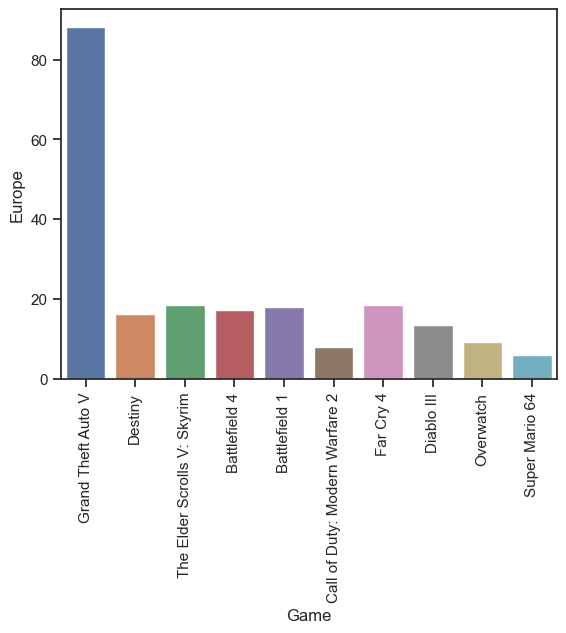

In [40]:
sns.barplot(data=region_sales,x='Game', y= 'Europe')
plt.xticks(ticks=range(len(region_sales)), labels=region_sales['Game'], rotation=90)
plt.show()

In [41]:
train['Top Ranked'].value_counts()

0    2506
1     199
Name: Top Ranked, dtype: int64

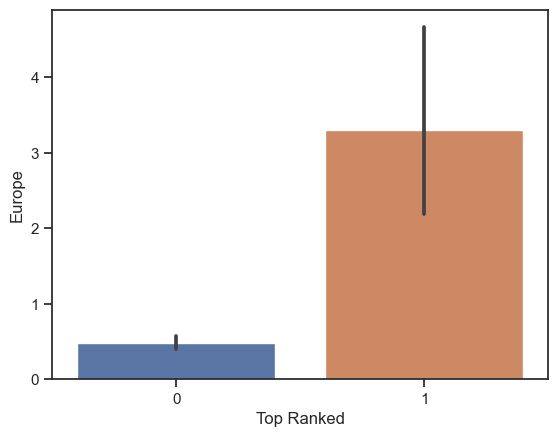

In [42]:
sns.barplot(data=top_ranked_country, x='Top Ranked', y='Europe')
plt.show()

# How does meta score relate to Top 500 Rank?

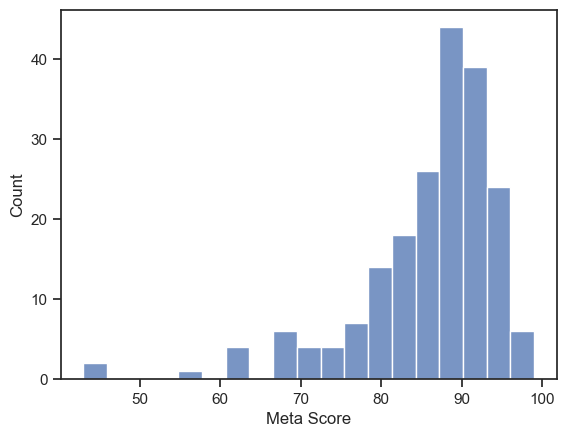

In [43]:
sns.histplot(x='Meta Score', data=train[train['Top Ranked']==1])
plt.show()

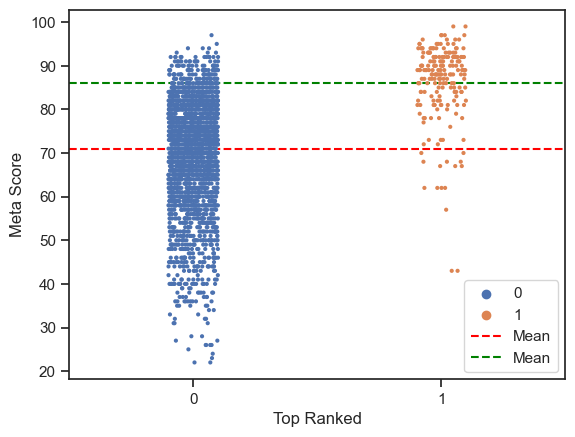

In [44]:
sns.stripplot(data= train, x='Top Ranked' , y='Meta Score', marker='o', edgecolor='black', s=3, hue='Top Ranked')
plt.axhline(train['Meta Score'].mean(), color='red', linestyle='dashed', label='Mean')
plt.axhline(train[train['Top Ranked']==1]['Meta Score'].mean(), color='green', linestyle='dashed', label='Mean')

plt.legend()
plt.show()

## Hypothesis

H
0
: Mean of Meta Scores for Top Ranked Games >= Mean of Meta Scores for All Games
\
H
a
: Mean of Meta Scores for Top Ranked Games < Mean of Meta Scores for All Game

In [45]:
# seting the alpha
α = 0.05

In [46]:
# stats testing for with one sample t-test

t, p = stats.ttest_1samp(train[train['Top Ranked']==1]['Meta Score'], train['Meta Score'].mean())
t, p

(23.926860697726568, 2.4915544193443087e-60)

In [47]:
# printing conclusion for t-test
print(p/2 < α)
print(t < 0)

True
False


We fail to reject the null hypothesis.

# How does User Review Score relate to Top 500 Rank?

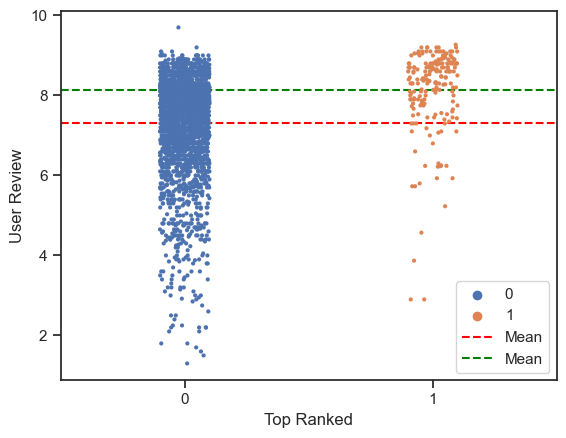

In [48]:
sns.stripplot(data= train, x='Top Ranked' , y='User Review', marker='o', edgecolor='black', s=3, hue='Top Ranked')
plt.axhline(train['User Review'].mean(), color='red', linestyle='dashed', label='Mean')
plt.axhline(train[train['Top Ranked']==1]['User Review'].mean(), color='green', linestyle='dashed', label='Mean')
plt.legend()
plt.show()

## Hypothesis

H
0
: Mean of User Review for Top Ranked Games >= Mean of User Review for All Games
\
H
a
: Mean of User Review for Top Ranked Games < Mean of User Review for All Game

In [49]:
t, p = stats.ttest_1samp(train[train['Top Ranked']==1]['User Review'], train['User Review'].mean())
t, p

(10.990333793881081, 3.0446955472145164e-22)

# How do Years relate to Top Ranked?

In [50]:
year_one = train[train['Top Ranked']==1]

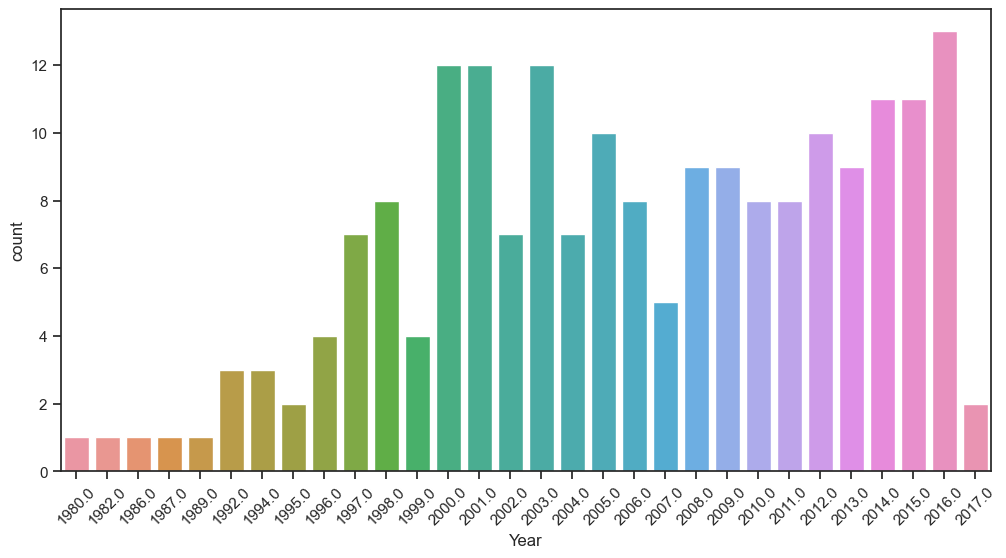

In [51]:
plt.figure(figsize=(12, 6))
sns.countplot(data=year_one, x='Year')
plt.xticks(rotation=45)
plt.show()

In [52]:
from model import decision_tree

# Decision Tree

In [53]:
decision_tree()

Training Dataset Model with Max Depth of 1,
Model's Accuracy: 0.9308687615526802
Difference between Model and Basleine Accuracy: 0.0044362292051755015
Train Classification Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2506
           1       0.53      0.57      0.55       199

    accuracy                           0.93      2705
   macro avg       0.75      0.76      0.75      2705
weighted avg       0.93      0.93      0.93      2705


           VS             

Validation Dataset Model with Max Depth of 1,
Model's Accuracy: 0.9293103448275862
Difference between Model and Basleine Accuracy: 0.002877812480081565
Validate Classification Report
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1094
           1       0.42      0.62      0.50        66

    accuracy                           0.93      1160
   macro avg       0.70      0.78      0.73      1160
weighted a

In [ ]:
dictionary_values()

In [ ]:
analysis_tree()

In [ ]:
print_tree_reprt()

In [ ]:
tree_difference_graph()

In [54]:
X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.X_y_split()

In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2705 entries, 2975 to 1215
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           2705 non-null   object 
 1   North America  2705 non-null   float64
 2   Europe         2705 non-null   float64
 3   Japan          2705 non-null   float64
 4   Rest of World  2705 non-null   float64
 5   Global         2705 non-null   float64
 6   Year           2705 non-null   float64
 7   Meta Score     2705 non-null   int64  
 8   User Review    2705 non-null   float64
 9   Action         2705 non-null   uint8  
 10  Adventure      2705 non-null   uint8  
 11  Fighting       2705 non-null   uint8  
 12  Misc           2705 non-null   uint8  
 13  Platform       2705 non-null   uint8  
 14  Racing         2705 non-null   uint8  
 15  Role-Playing   2705 non-null   uint8  
 16  Shooter        2705 non-null   uint8  
 17  Simulation     2705 non-null   uint8  
 18  Sport

In [56]:
import model

In [57]:
# from sklearn.metrics import classification_report
# from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier(max_depth=3, random_state=123)
# clf_fit = clf.fit(X_train, y_train)


In [58]:
# clf.fit(X_train, y_train)

In [59]:
knn_model()

Training Dataset Model with Max Depth of 1,
Model's Accuracy: 1.0
Difference between Model and Basleine Accuracy: 0.07356746765249533
Train Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2506
           1       1.00      1.00      1.00       199

    accuracy                           1.00      2705
   macro avg       1.00      1.00      1.00      2705
weighted avg       1.00      1.00      1.00      2705


           VS             

Validation Dataset Model with Max Depth of 1,
Model's Accuracy: 0.9370689655172414
Difference between Model and Basleine Accuracy: 0.010636433169736725
Validate Classification Report
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1094
           1       0.46      0.61      0.52        66

    accuracy                           0.94      1160
   macro avg       0.72      0.78      0.74      1160
weighted avg       0.95    

Training Dataset Model with Max Depth of 9,
Model's Accuracy: 0.9489833641404806
Difference between Model and Basleine Accuracy: 0.0225508317929759
Train Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2506
           1       0.73      0.49      0.59       199

    accuracy                           0.95      2705
   macro avg       0.84      0.74      0.78      2705
weighted avg       0.94      0.95      0.94      2705


           VS             

Validation Dataset Model with Max Depth of 9,
Model's Accuracy: 0.95
Difference between Model and Basleine Accuracy: 0.02356746765249529
Validate Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1094
           1       0.59      0.39      0.47        66

    accuracy                           0.95      1160
   macro avg       0.78      0.69      0.72      1160
weighted avg       0.94     

Training Dataset Model with Max Depth of 17,
Model's Accuracy: 0.9463955637707948
Difference between Model and Basleine Accuracy: 0.019963031423290145
Train Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2506
           1       0.72      0.45      0.55       199

    accuracy                           0.95      2705
   macro avg       0.84      0.72      0.76      2705
weighted avg       0.94      0.95      0.94      2705


           VS             

Validation Dataset Model with Max Depth of 17,
Model's Accuracy: 0.95
Difference between Model and Basleine Accuracy: 0.02356746765249529
Validate Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1094
           1       0.59      0.41      0.48        66

    accuracy                           0.95      1160
   macro avg       0.78      0.70      0.73      1160
weighted avg       0.94 

In [60]:
forest_model()

Training Dataset Model with Max Depth of 10,
And Leaf Level of 1:
Model's Accuracy: 0.9914972273567467
Difference between Model and Basleine Accuracy: 0.06506469500924206
Train Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2506
           1       0.99      0.89      0.94       199

    accuracy                           0.99      2705
   macro avg       0.99      0.94      0.97      2705
weighted avg       0.99      0.99      0.99      2705


           VS             

Validation Dataset Model with Max Depth of 10,
And Leaf Level of 1:
Model's Accuracy: 0.9646551724137931
Difference between Model and Basleine Accuracy: 0.038222640066288394
Validate Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1094
           1       0.76      0.56      0.64        66

    accuracy                           0.96      1160
   macro avg       0.8

Training Dataset Model with Max Depth of 2,
And Leaf Level of 9:
Model's Accuracy: 0.9349353049907578
Difference between Model and Basleine Accuracy: 0.008502772643253165
Train Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2506
           1       0.93      0.13      0.22       199

    accuracy                           0.93      2705
   macro avg       0.93      0.56      0.59      2705
weighted avg       0.93      0.93      0.91      2705


           VS             

Validation Dataset Model with Max Depth of 2,
And Leaf Level of 9:
Model's Accuracy: 0.9517241379310345
Difference between Model and Basleine Accuracy: 0.02529160558352983
Validate Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1094
           1       0.81      0.20      0.32        66

    accuracy                           0.95      1160
   macro avg       0.88 

In [61]:
log_model()

Training Dataset Model Coefficient of 0.01,
Model's Accuracy: 0.4698706099815157
Difference between Model and Basleine Accuracy: -0.45656192236598897
Train Classification Report
              precision    recall  f1-score   support

           0       1.00      0.43      0.60      2506
           1       0.12      0.98      0.21       199

    accuracy                           0.47      2705
   macro avg       0.56      0.71      0.41      2705
weighted avg       0.93      0.47      0.57      2705


           VS             

Validation Dataset Model Coefficient of 0.01,
Model's Accuracy: 0.46293103448275863
Difference between Model and Basleine Accuracy: -0.46350149786474604
Validate Classification Report
              precision    recall  f1-score   support

           0       0.99      0.43      0.60      1094
           1       0.09      0.95      0.17        66

    accuracy                           0.46      1160
   macro avg       0.54      0.69      0.39      1160
weighted a

Training Dataset Model Coefficient of 0.15,
Model's Accuracy: 0.5271719038817005
Difference between Model and Basleine Accuracy: -0.3992606284658041
Train Classification Report
              precision    recall  f1-score   support

           0       1.00      0.49      0.66      2506
           1       0.13      0.98      0.23       199

    accuracy                           0.53      2705
   macro avg       0.56      0.74      0.45      2705
weighted avg       0.93      0.53      0.63      2705


           VS             

Validation Dataset Model Coefficient of 0.15,
Model's Accuracy: 0.5137931034482759
Difference between Model and Basleine Accuracy: -0.4126394288992288
Validate Classification Report
              precision    recall  f1-score   support

           0       1.00      0.49      0.65      1094
           1       0.10      0.97      0.18        66

    accuracy                           0.51      1160
   macro avg       0.55      0.73      0.42      1160
weighted avg 